In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import evallm
from automata.fa.dfa import DFA
import tqdm.auto as tqdm

In [3]:
import itertools

In [4]:
results = evallm.experiments.transducer_experiment.current_transducer_experiments()

In [5]:
relative_to_null = pd.DataFrame(
    {
        num_states: {
            num_sequence_symbols: np.mean(
                [
                    x.success_rate_binary > x.null_success_rate
                    for x in results[num_states][num_sequence_symbols]
                ]
            )
            for num_sequence_symbols in results[num_states]
        }
        for num_states in results
    }
)

In [6]:
def plot_relative_results(relative, name):
    plt.figure(dpi=200)
    for k in relative:
        plt.plot(relative[k].index, relative[k] * 100, label=f"{k} states")
    plt.legend()
    plt.xlabel("Sequence Length")
    plt.ylabel(f"Meets {name} %")
    plt.axhline(50, color="black")
    plt.grid()
    plt.show()

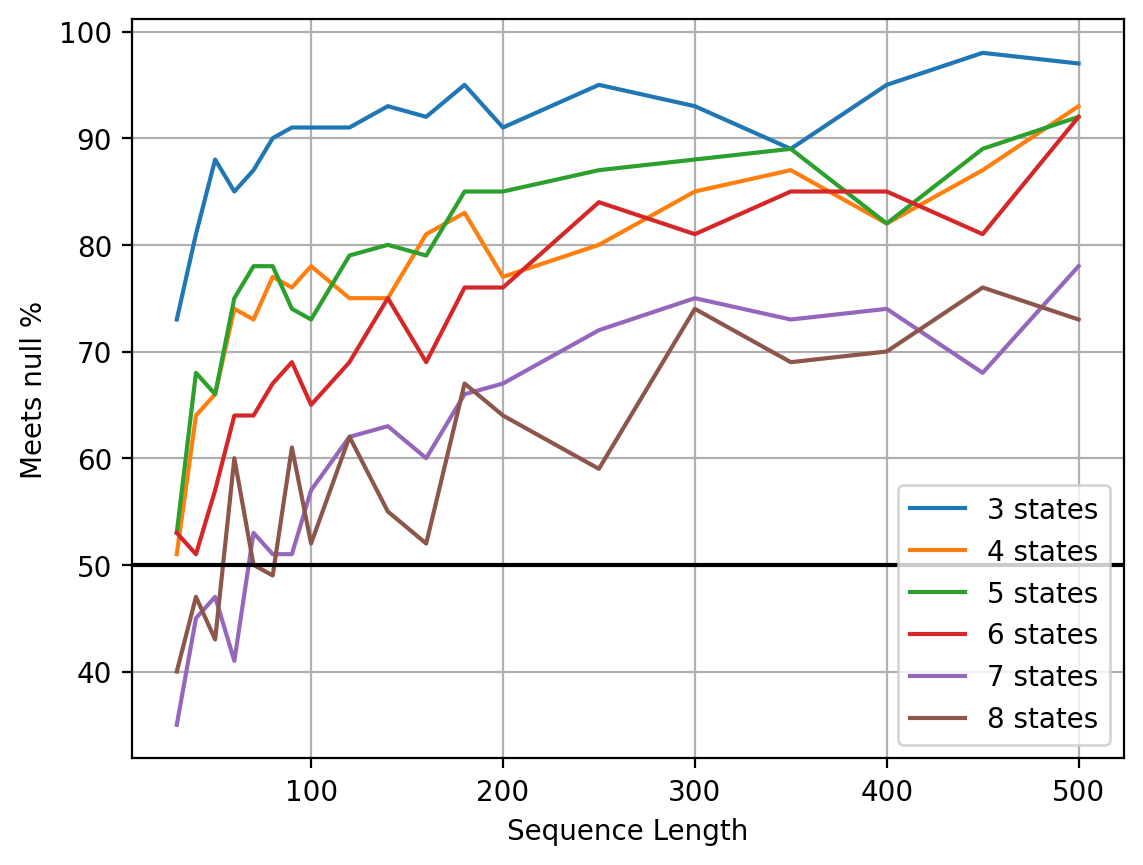

In [7]:
plot_relative_results(relative_to_null, "null")

In [8]:
relative_to_kgram = lambda k: pd.DataFrame(
    {
        num_states: {
            num_sequence_symbols: np.mean(
                [
                    x.success_rate_binary_meets_kgram >= k
                    for x in results[num_states][num_sequence_symbols]
                ]
            )
            for num_sequence_symbols in results[num_states]
        }
        for num_states in results
    }
)

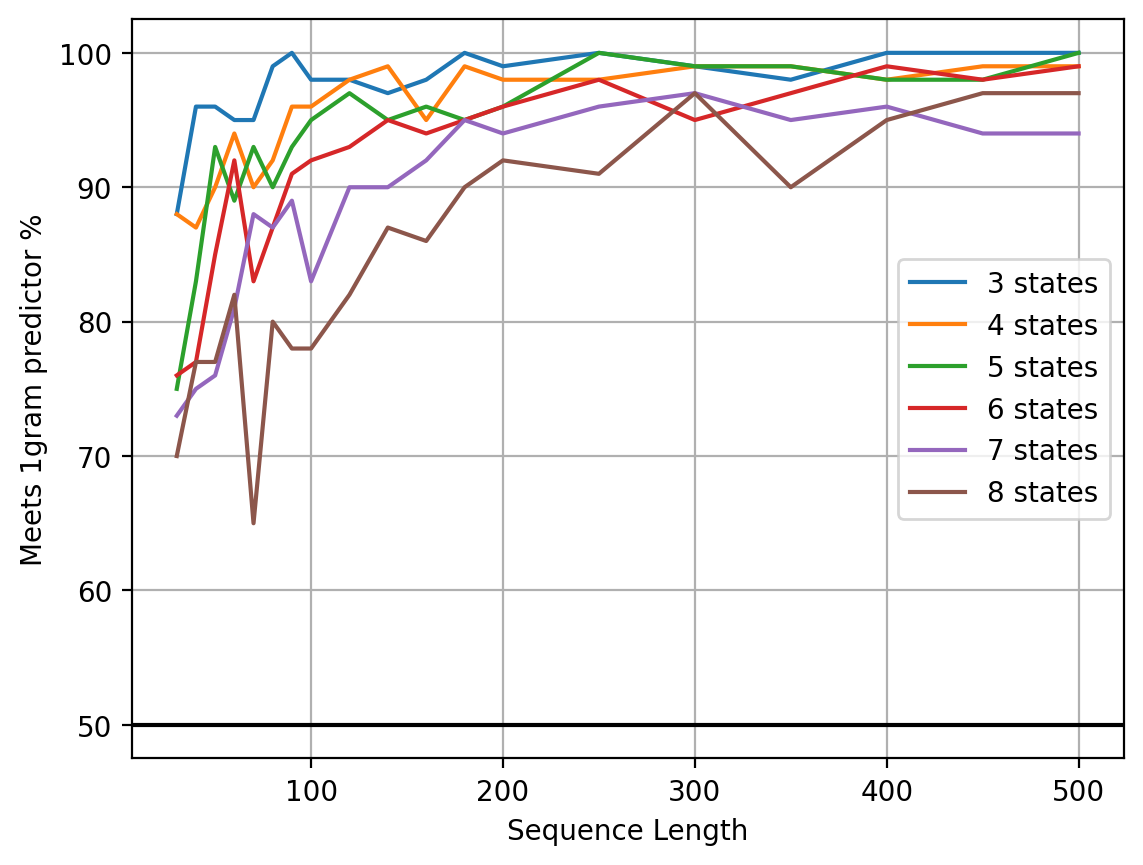

In [9]:
plot_relative_results(relative_to_kgram(1), "1gram predictor")

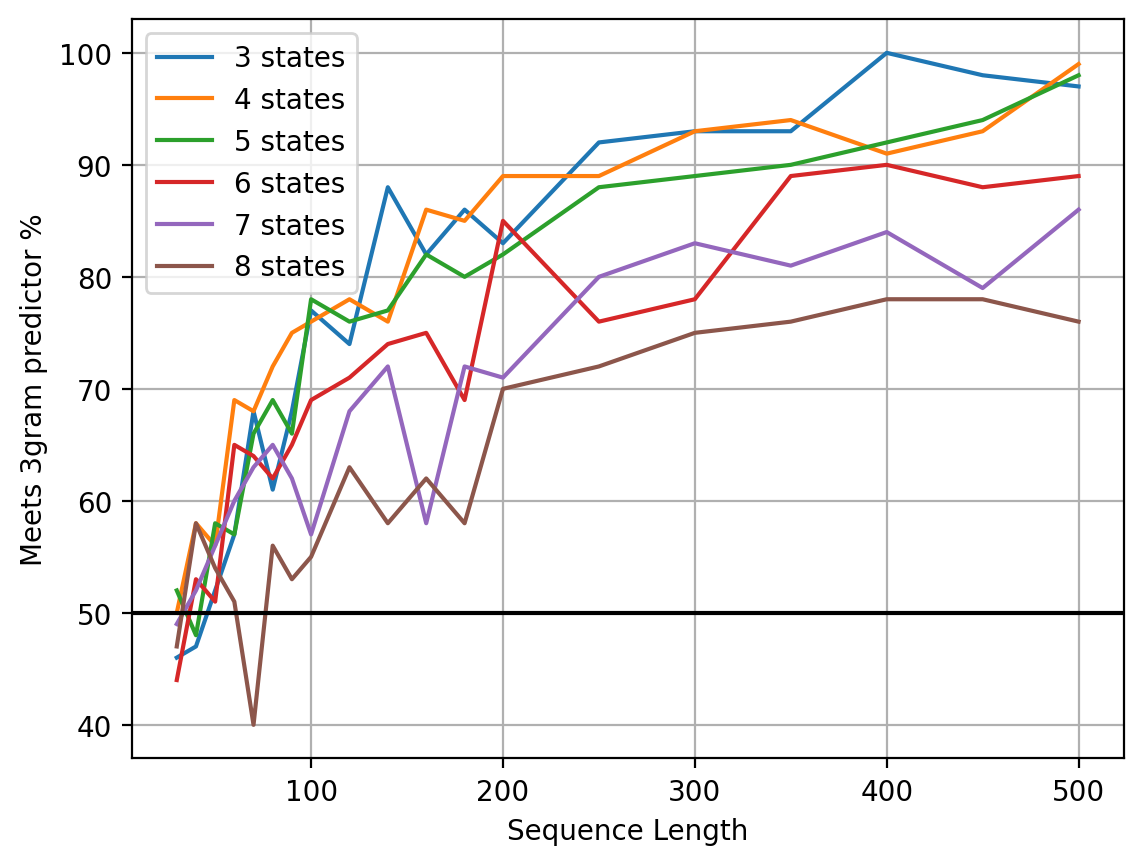

In [10]:
plot_relative_results(relative_to_kgram(2), "3gram predictor")

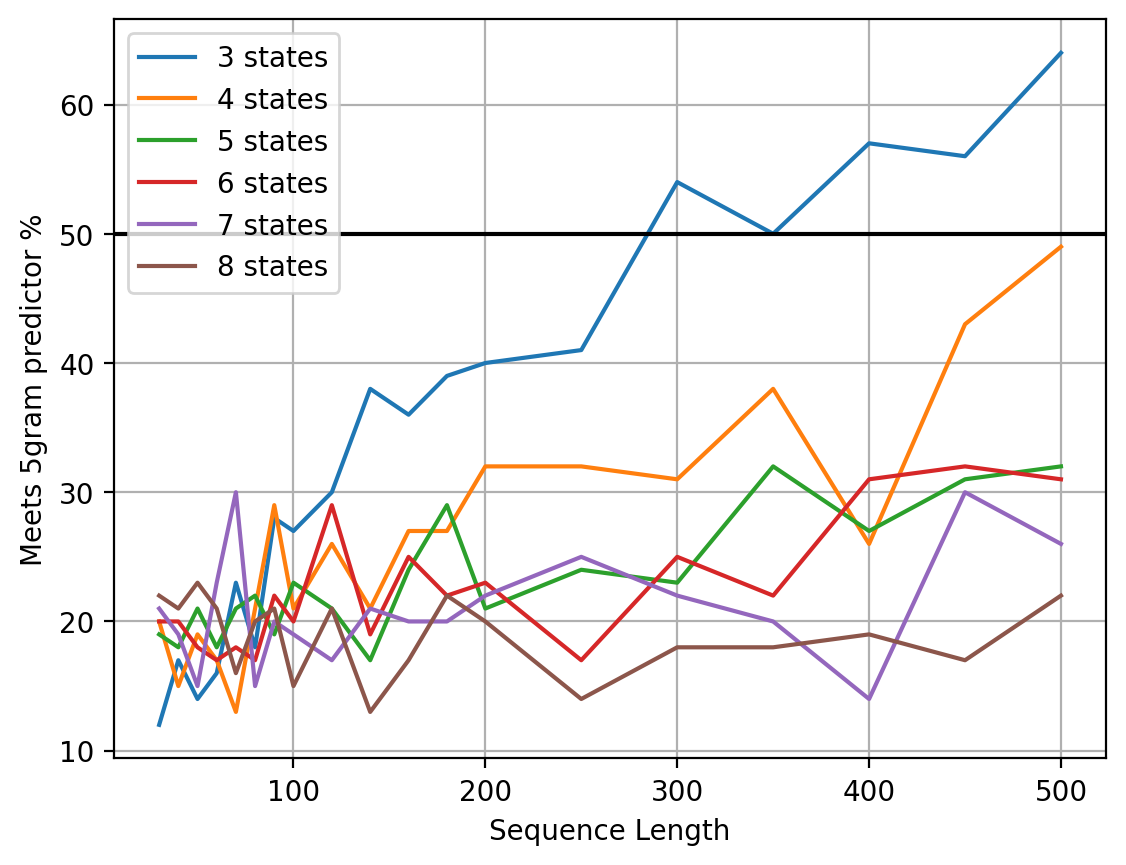

In [11]:
plot_relative_results(relative_to_kgram(5), "5gram predictor")

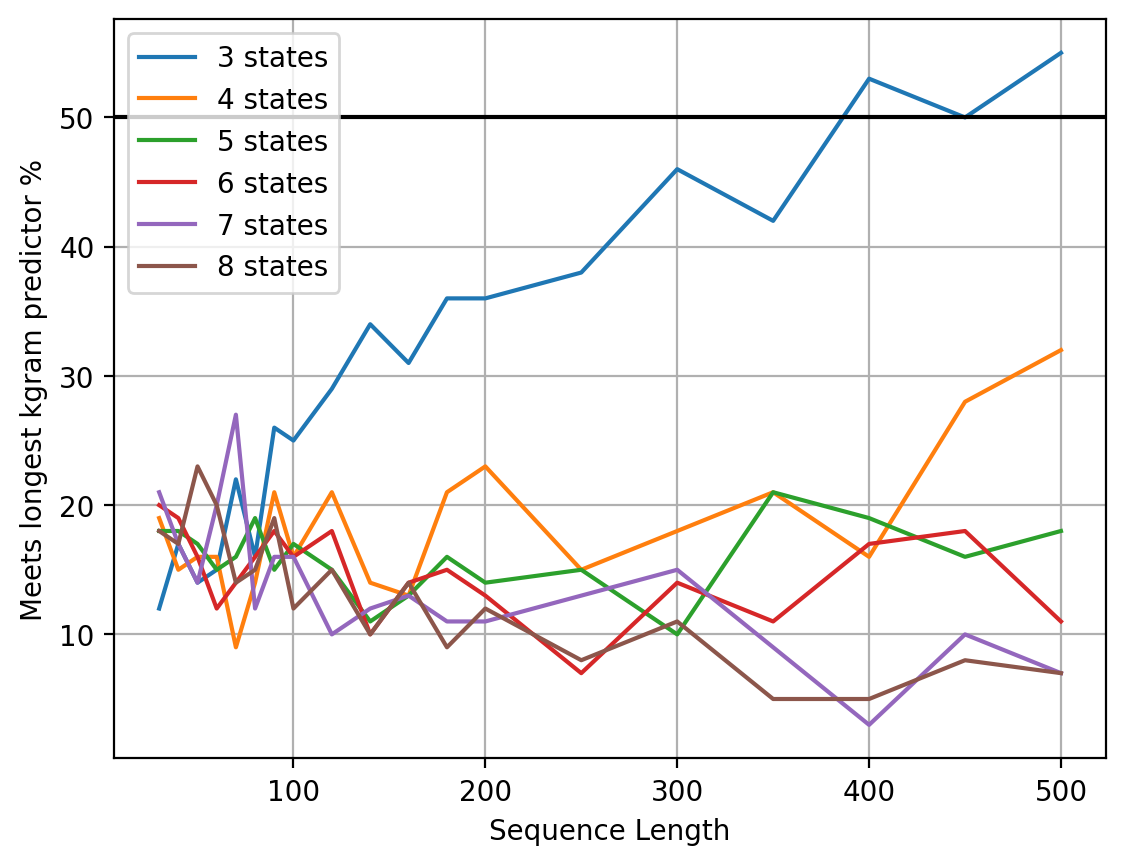

In [12]:
plot_relative_results(relative_to_kgram(10**9), "longest kgram predictor")